**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.**

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset**

webtraffic.csv

dataset = pd.read_csv('C:/Users/srikanth/Desktop/MLInternship/Batch1/day4/datasets/Grade_Set_1.csv')

In [2]:
dataset = pd.read_csv('./datasets/web_traffic.tsv',delimiter='\t',header = None) # Comma seperated values
dataset.head()

,0,1
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [3]:
dataset = dataset.dropna()
dataset.columns = ['Hours', 'Hits_per_hours']
dataset.head()

,Hours,Hits_per_hours
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [4]:
dataset.keys()

Index(['Hours', 'Hits_per_hours'], dtype='object')

**Step-1: Converting Dataframes into array**

X = dataset[0].values # independent variable

y = dataset[1].values # independent variable

In [5]:
X = dataset.iloc[:,0:-1].values # independent variable
y = dataset.iloc[:,-1].values # independent variable

**Step-2: if data is unstructued -> converting into structred**

In [6]:
# X = np.reshape(X,(len(X),1)) # reshaping
# y = np.reshape(y,(len(y),1)) # reshaping
# print('Shape of X ', X.shape)
# print('Shape of y ', y.shape)

In [7]:
import seaborn as sns

                   Hours  Hits_per_hours
Hours           1.000000        0.645232
Hits_per_hours  0.645232        1.000000


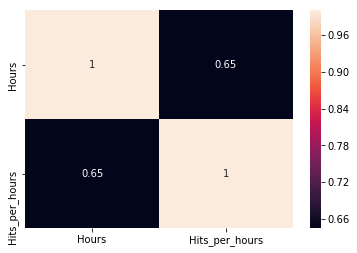

In [8]:
print(dataset.corr())
sns.heatmap(dataset.corr(),annot=True)
plt.show()

**Step-3: Visualize the data : Scatter**

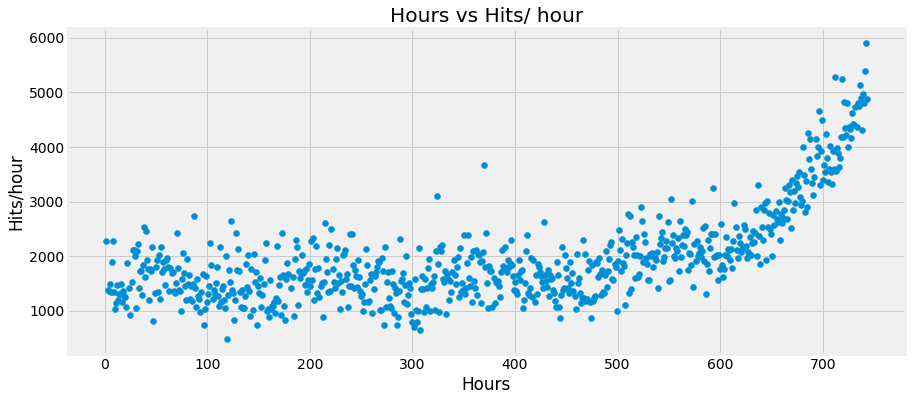

In [9]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Hits/hour')
plt.title('Hours vs Hits/ hour')
plt.show()

# Building Simple linear regression using

**sklearn**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
predictor = LinearRegression()

In [12]:
predictor.fit(X,y) # training model(linear regression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred = predictor.predict(X) # input values

In [14]:
dataset['Predicted'] = y_pred
dataset.head()

,Hours,Hits_per_hours,Predicted
0,1,2272.0,991.621063
2,3,1386.0,996.813447
3,4,1365.0,999.409640
4,5,1488.0,1002.005832
5,6,1337.0,1004.602024


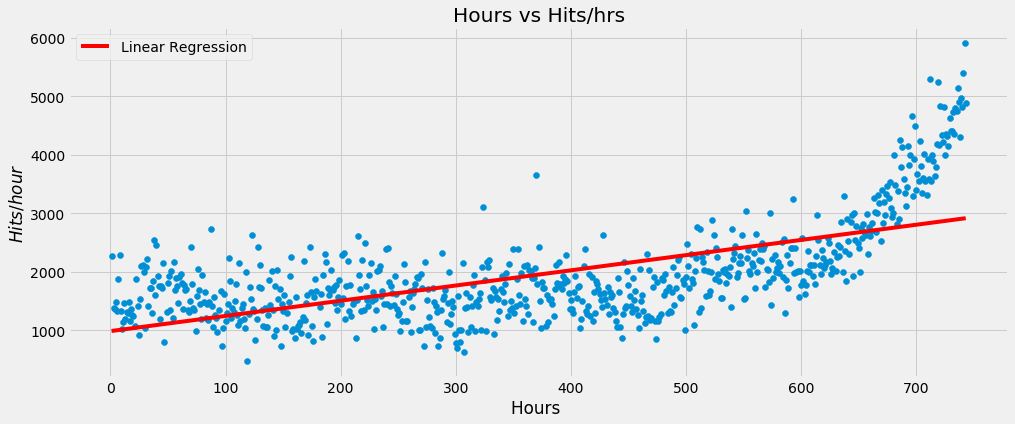

In [15]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')

plt.xlabel('Hours ')
plt.ylabel('$Hits / hour$')
plt.title('Hours vs Hits/hrs')
plt.legend(['Linear Regression'])
plt.show()

In [16]:
b0 = predictor.intercept_
b1 = predictor.coef_
# y_pred = b0 + b1 * X

**Estimating 1,00,000 hits/hours** 

so, y_pred = 1,00,000 and we know b0, b1 calculate "X"

$X = (y_pred - b0)/(b1)$

In [20]:
X_pred  = (100000 - b0)/b1
print('From Simle linear regression it is predicting that you need to upgrade your server within {} weeks'.format(int((X_pred[0] - len(X))/(24*7))))

From Simle linear regression it is predicting that you need to upgrade your server within 222 weeks


# Evaluating model preformace 

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
print('R2 Score:', r2_score(y, y_pred))
print('Mean Absolute error:', mean_absolute_error(y, y_pred))
print('Mean Squared error:', mean_squared_error(y, y_pred))

R2 Score: 0.41632369094258925
Mean Absolute error: 504.8810103756525
Mean Squared error: 431822.812707181


# Great job !!!